## Data Analysis of Student Marks

In this project, we will do a brief analysis of a dataset of students and their exams marks given across three consecutive years.
 
*This was performed during a university course on data exploration and analysis.*

In [43]:
#load libraries
library(tidyr)
library(dplyr)
library(readr)
#import dataset
studentmarks <- read_csv("Studentmarks.csv", show_col_types = FALSE)

In [44]:
#view dataset
head(studentmarks)

StudentID,Studentname,dob,2020,2021,2022
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Anna,12/12/1998,75,78,85
2,James,10/08/1999,65,74,52
3,Mary,21/08/1998,56,68,90
4,Antony,02/05/1999,78,65,85
5,Jacob,22/07/1998,85,78,65
6,Angelin,11/05/1998,65,68,70


**Calculate the age of the students and add that as a new numeric column _age1_.**

In [45]:
#change dob into date format
studentmarks$dob<-as.Date(studentmarks$dob, format="%d/%m/%Y")

In [46]:
#add new column age1 which calculates age of student in numeric form
studentmarks$age1<- as.numeric(difftime(Sys.Date(), studentmarks$dob))/365
print(studentmarks)

# A tibble: 10 × 7
   StudentID Studentname dob        `2020` `2021` `2022`  age1
       <dbl> <chr>       <date>      <dbl>  <dbl>  <dbl> <dbl>
 1         1 Anna        1998-12-12     75     78     85  26.0
 2         2 James       1999-08-10     65     74     52  25.3
 3         3 Mary        1998-08-21     56     68     90  26.3
 4         4 Antony      1999-05-02     78     65     85  25.6
 5         5 Jacob       1998-07-22     85     78     65  26.4
 6         6 Angelin     1998-05-11     65     68     70  26.6
 7         7 Kellie      1999-04-19     78     52     88  25.6
 8         8 Jesse       1998-06-27     77     72     75  26.4
 9         9 John        1998-10-15     90     87     88  26.1
10        10 Therese     1998-11-06     95     85     75  26.1


**Split the dob column into date month and year and then calculate the age based on the year column only and add that as a new integer column _age2_.**

In [47]:
#split into date month year
studentmarks<-separate(studentmarks, col=dob, into=c("Year", "Month", "Date"))

In [48]:
#calculate age based on year column
studentmarks$Year<-as.numeric(studentmarks$Year)
currentyear<-as.numeric(format(Sys.Date(), "%Y"))
studentmarks$age2<-as.integer(currentyear - studentmarks$Year)
print(studentmarks)

# A tibble: 10 × 10
   StudentID Studentname  Year Month Date  `2020` `2021` `2022`  age1  age2
       <dbl> <chr>       <dbl> <chr> <chr>  <dbl>  <dbl>  <dbl> <dbl> <int>
 1         1 Anna         1998 12    12        75     78     85  26.0    26
 2         2 James        1999 08    10        65     74     52  25.3    25
 3         3 Mary         1998 08    21        56     68     90  26.3    26
 4         4 Antony       1999 05    02        78     65     85  25.6    25
 5         5 Jacob        1998 07    22        85     78     65  26.4    26
 6         6 Angelin      1998 05    11        65     68     70  26.6    26
 7         7 Kellie       1999 04    19        78     52     88  25.6    25
 8         8 Jesse        1998 06    27        77     72     75  26.4    26
 9         9 John         1998 10    15        90     87     88  26.1    26
10        10 Therese      1998 11    06        95     85     75  26.1    26


**Create a scatter plot for Studentname versus Marks of all three years on the same chart.**

In [51]:
#convert wide data to long format
studentmarks_new <- studentmarks %>%
    pivot_longer(cols = c(`2020`, `2021`, `2022`), 
                 names_to = "Years", 
                 values_to = "Marks")

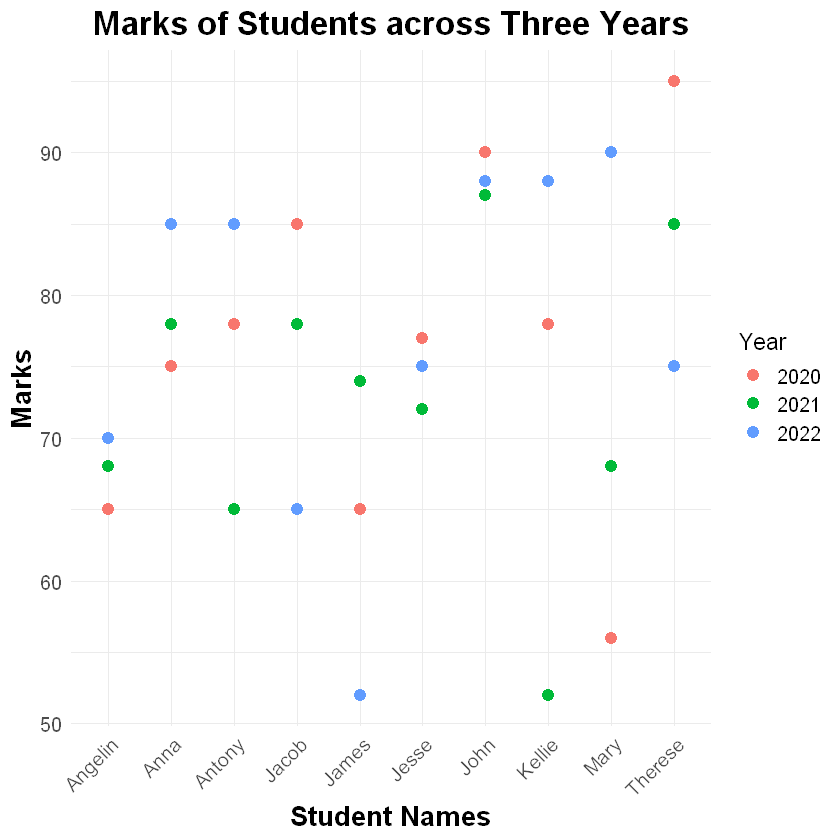

In [54]:
#scatterplot of Studentname vs Marks for all three years 
library(ggplot2)
ggplot(data=studentmarks_new, mapping=aes(x=Studentname, y=Marks, color=Years))+
  geom_point(size=3) +
  xlab("Student Names") + 
  ylab("Marks") +  
  labs(title= "Marks of Students across Three Years", color="Year")+
  theme_minimal()+
  theme(
        plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
        axis.text.y = element_text(size = 12),                            
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold"),             
        legend.title = element_text(size = 14),                            
        legend.text = element_text(size = 12) 
    )

**Calculate the total marks of all students and filter the who got at least 200 marks in total and create a bar chart for students vs totalmarks in the descending order of their marks.**

In [55]:
#sum marks to calculate total marks
studentmarks$totalmarks<-(studentmarks$`2020`+studentmarks$`2021`+studentmarks$`2022`)
#filter for marks over 200
ex <-studentmarks %>% filter(totalmarks>=200)
#arrange students in descending order by marks
ex2 <-arrange(ex, desc(totalmarks)) %>% mutate(Studentname=factor(Studentname, levels=Studentname))

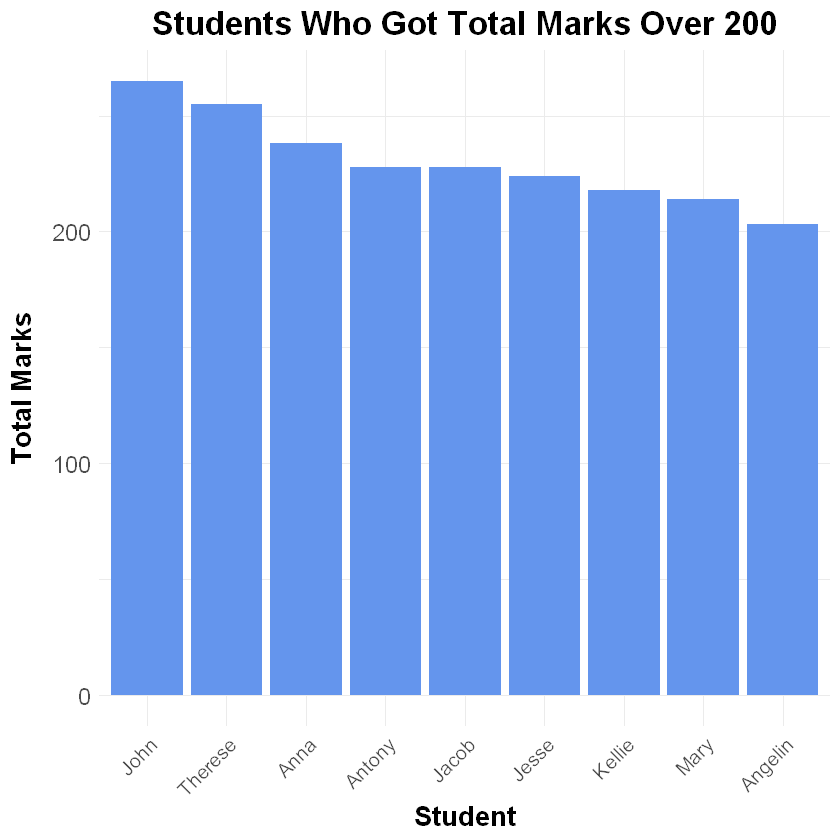

In [74]:
#plot barchart
ggplot(ex2, aes(x=Studentname, y=totalmarks))+
  geom_col(fill='cornflowerblue')+
  xlab("Student")+
  ylab("Total Marks")+
  theme_minimal()+
  ggtitle("Students Who Got Total Marks Over 200")+
  theme(plot.title = element_text(hjust = 0.5, size = 20, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
        axis.text.y = element_text(size = 14),     
        axis.title.x = element_text(size = 16, face = "bold"),            
        axis.title.y = element_text(size = 16, face = "bold", margin = margin(r = 10)),  
        )